# Project 2: Classification - MSDS 7331
## Southern Methodist University 
# Glenn, Tweardy, Severance

## Business Understanding

The dataset for analysis originates from the UCI Machine Learning Repository. It contains data from the 1994 Census database and was originally extracted by Barry Becker. These data contain 48,842 observations and 14 attributes seperated in two distinct datsets, training and testing. Becker extracted the census data based on meeting all of the following four conditions:
        
        1. AAGE > 16
        2. AGI > 100
        3. AFNLWGT > 1
        4. HRSWK > 0

As noted, these data are split by Becker into train-test datasets using MLC++ GenCVFiles (2/3, 1/3 random).

48,842 instances, mix of continuous and discrete    (train=32,561, test=16,281)

45,222 of instances with unknown values are removed (train=30,162, test=15,060)

train = adult.data AND test = adult.test

Ref: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

The original task for gathering this dataset and what will be analyzed throughout this semester's project is to predict whether an individual earns more than $50,000 per year in annual salary.  The attribte salary_range designates the annual salary via a binary classification of: >50K or <=50K.

We aim to use the classification prediction method of taking the collection of records (adult.data) as the training set, whereas salary_range is the class.  We will develop a model which aims to predict the class, salary_range, as a function of the other attributes.  Ultimately, our goal is take the test data, adult.test, and predict the class, salary_range, as accurately as possible.  Therefore, below we are preprocessing the training dataset, adult.data, containing the 32,561 instances.

In conducting an analysis on this data, there are many reasons why an organization would benefit from it. One in particular could be from a marketing standpoint. Businesses invest a large portion of there expenditures toward their marketing department to make sure that they market their products toward the correct demographics. For example, marketing the latest and greatest BMW to a demographic of individuals that make less than $50k annually is probably not a smart business decision and would undoubtedly fail. The financial cost of this mistake could potentially cost a company millions of dollars. The benefit a company has to understanding their customer base can truly be a profitable advantage. The factors in this model could be used by an organization to manage their marketing activity by developing and advertising products to meet the needs of their specific customer base.

If you were to market a BMW to a certain demographic by email, you do not mind if you have false positives. We want to email all people that our data say is a positive even if it may be wrong. We are ok sending it out to a false positive in order to get the email out to the correct demographic since this is a cheap way of advertising. This is considered high recall. 

Conversely, if you were to hold a car show and cover travel and lodging expenses as well as "wine and dine" the customer, you would not want to miss your target demographic and invite the wrong demographics. It is much more expensive to advertise to the wrong group. Therefore, we are okay with not sending the invite to people because we have them classified wrong. This would be considered high precision because everyone that is invited will have been classified correctly even if we miss some.

We know this example might be considered an extreme, but we are focusing this project on the scenario of sending out an email advertising campaign.  As such we are focusing on high accuracy so that we get the highest guarantee that the customers we are targetting are in the class of making more than $50K.   

We believe that a typical BMW customer has a higher level of education. For this reason, the second task that we have chosen to predict is education level based on the other variables. Again, with the email campaign we want a high accuracy in the demographics that receive the email. Therefore, we are looking for high accuracy in this task as well.

In predicting both tasks, we will use K-Nearest Neighbors, Random Forest, and Logistic Regression.

For the extra work, we have performed a grid search for the K-Nearest Neighbors and Random Forest models in both tasks.

Additionally, for both tasks we used ten fold cross validation because we believe the data is not biased toward one class. Therefore, ten fold cross validation would sufficiently divide the data. 

## Project Data Import

We first load our Project 1 dataset and prepare it for analysis. 

<b>The below describes the meaning and type of data for each attribute in the data file per UCI Machine Learning Repository:</b><br>
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names<br>

<b>age:</b> <u>Ordinal.</u><br>
<b>workclass:</b> <u>Categorical.</u> Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.<br>
<b>fnlwgt:</b> <u>Continuous.</u><br>
<b>education:</b> <u>Categorical.</u> Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.<br>
<b>education-num:</b> <u>Ordinal.</u><br>
<b>marital-status:</b> <u>Categorical.</u> Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.<br>
<b>occupation:</b> <u>Categorical.</u> Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.<br>
<b>relationship:</b> <u>Categorical.</u> Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.<br>
<b>race:</b> <u>Categorical.</u> White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.<br>
<b>sex:</b> <u>Categorical.</u> Female, Male.<br>
<b>capital-gain:</b> <u>Continuous.</u><br>
<b>capital-loss:</b> <u>Continuous.</u><br>
<b>hours-per-week:</b> <u>Ordinal.</u><br>
<b>native-country:</b> <u>Categorical.</u> United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.<br>
<b>salary_category:</b> <u>Categorical.</u> >50K, <=50K.<br>


In [1]:
import pandas as pd
import numpy as np

# reference: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
# Load data and assign attribute field names
df = pd.read_csv('data/adult.data', 
names = ["age", "workclass", "fnlwgt", "education", "education_num","marital_status","occupation",
         "relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country",
         "salary_category"])

<b>The below block code is our transformation and removal of missing data.</b>

In [2]:
# Reference: https://github.com/eclarson/DataMiningNotebooks/blob/master/01.%20Pandas.ipynb

# Changing the numeric values to be floats
continuous_features = ['fnlwgt', 'capital_gain', 'capital_loss']

# Changing oridnal values to be integers
ordinal_features = ['age','education_num','hours_per_week']

# We won't touch these variables, keep them as categorical
categ_features = ['workclass','education','marital_status','occupation',
                  'relationship','race','sex','native_country','salary_category'];

# Using the "astype" function to change the variable type
df[continuous_features] = df[continuous_features].astype(np.float64)
df[ordinal_features] = df[ordinal_features].astype(np.int64)

# Replacing missing values which are represented as question marks in data with NaN 
df = df.replace(to_replace=' ?', value=np.nan)

# http://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-of-certain-column-is-nan
# Drop all records with any values of NaN (missing values)
df.dropna(inplace=True)

In [3]:
# View the summary of the variables to ensure salary_cat_binary type is Int64 and view objects for subsequent block of code.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
age                30162 non-null int64
workclass          30162 non-null object
fnlwgt             30162 non-null float64
education          30162 non-null object
education_num      30162 non-null int64
marital_status     30162 non-null object
occupation         30162 non-null object
relationship       30162 non-null object
race               30162 non-null object
sex                30162 non-null object
capital_gain       30162 non-null float64
capital_loss       30162 non-null float64
hours_per_week     30162 non-null int64
native_country     30162 non-null object
salary_category    30162 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 3.7+ MB


Below we look further at each of the categorical objects.

In [4]:
# Reference: https://github.com/eclarson/DataMiningNotebooks/blob/master/04.%20Logits and SVM.ipynb
# View categorical variables which need to onehotencoding.

df[['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'salary_category']].describe().transpose()

,count,unique,top,freq
workclass,30162,7,Private,22286
education,30162,16,HS-grad,9840
marital_status,30162,7,Married-civ-spouse,14065
occupation,30162,14,Prof-specialty,4038
relationship,30162,6,Husband,12463
race,30162,5,White,25933
sex,30162,2,Male,20380
native_country,30162,41,United-States,27504
salary_category,30162,2,<=50K,22654


A look at our 9 categorical variables reveals:
* Workclass has 7 unique values, the most frequently occurring value is 'Private' - 74% of all occurances (22,286/30,162)
* Education has 16 unique values, the most frequently occurring value is 'HS-Grad' - 33% of all occurances (9,840/30,162)
* Marrital Status has 7 unique values, the most frequently occurring value is 'Married-Civ-Spouse' - 47% of all occurances (14,065/30,162) 
* Occupation has 14 unique values, the most frequently occurring value is 'Prof-speciality' - 13% of all occurances (4,038/30,162)
* Relationship has 6 unique values, the most frequently occurring value is 'Husband' - 41% of all occurances (12,463/30,162)
* Race has 5 unique values, the most frequently occurring value is 'White' - 86% of all occurances (25,933/30,162)
* Sex has 2 unique values, the most frequently occurring value is 'Male' - 68% of all occurances (20,380/30,162)
* Native Country has 41 unique values, the most frequently occurring value is 'United States' - 91% of all occurances (27,504/30,162)
* Salary Category has 2 unique values, the most frequently occurring value is '<=50K' - 75% of all occurances (22,654/30,162)

<b>Begin one-hot encoding of the categorical variables</b>

In [5]:
# Perform one-hot encoding of the categorical data 
tmp_df = pd.get_dummies(df.workclass,prefix='workclass')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe
del df['workclass']

tmp_df = pd.get_dummies(df.marital_status,prefix='marital_status')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe
del df['marital_status']

tmp_df = pd.get_dummies(df.occupation,prefix='occupation')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe
del df['occupation']

tmp_df = pd.get_dummies(df.relationship,prefix='relationship')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe
del df['relationship']

tmp_df = pd.get_dummies(df.race,prefix='race')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe
del df['race']

tmp_df = pd.get_dummies(df.native_country,prefix='native_country')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe
del df['native_country']

# Replace the current Sex atribute with something slightly more intuitive and readable
df['IsMale'] = df.sex=='Male' 
df.IsMale = df.IsMale.astype(np.int)
del df['sex']

# Replace the current Salary_Category atribute with something slightly more intuitive and readable
df['salary_cat_binary'] = df.salary_category==' >50K' 
df.salary_cat_binary = df.salary_cat_binary.astype(np.int)
del df['salary_category']


In [6]:
# For part b of the project, we will be doing another analysis.
# We want to save the data at this point in preparation of part b, we will return to this later
partBDf = df

tmp_df = pd.get_dummies(df.education,prefix='education')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe
del df['education']

In [7]:
# Review the data to ensure onehotencoding was successful.
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Columns: 104 entries, age to education_ Some-college
dtypes: float64(99), int32(2), int64(3)
memory usage: 23.9 MB


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college
0,39,77516.0,13,2174.0,0.0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50,83311.0,13,0.0,0.0,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38,215646.0,9,0.0,0.0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,53,234721.0,7,0.0,0.0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,338409.0,13,0.0,0.0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


We now pull out the underlying data from the Pandas dataframe and store into numpy matrices.<br>
For this part, we decided to do a 10 fold cross validation.
We are using the "salary_cat_bin" as our Y, and the remaining fields as our X.


In [8]:
# For this project, we are going to do a 10 fold split
if 'salary_cat_binary' in df:
    y = df['salary_cat_binary'].values # get the labels we want
    del df['salary_cat_binary']
X = df.values
from sklearn.cross_validation import KFold 
cv_object = KFold(n=len(X), n_folds=10)
print(cv_object)

sklearn.cross_validation.KFold(n=30162, n_folds=10, shuffle=False, random_state=None)


Now that we have our data split into 10 folds.  We will create a couple of different models to compare. 

## K-Nearest Neighbors

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import StratifiedKFold, cross_val_score
import numpy as np
from sklearn import metrics as mt
from sklearn.grid_search import GridSearchCV

# Create variables we are more familiar with
yhat = np.zeros(y.shape) # we will fill this with predictions

# Create cross validation iterator
cv = StratifiedKFold(y, n_folds=10)

# Get a handle to the classifier object, which defines the type
knn_clf = KNeighborsClassifier(n_neighbors=3)


total_accuracy = mt.accuracy_score(y, yhat)
print 'KNN accuracy', total_accuracy

# Source: https://youtu.be/Gol_qOgRqfA

# Define parameter values to be searched
k_range = range(1, 11)
print(k_range)

# Create parameter grid: map parameter names to values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

# Instantiate the grid
gs = GridSearchCV(knn_clf, param_grid = param_grid, cv = 10, scoring = 'accuracy')

# Fit grid with data
gs.fit(X,y)

KNN accuracy 0.751077514754
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [10]:
# View the complete results(list of named tuples)
gs.grid_scores_

[mean: 0.72857, std: 0.00529, params: {'n_neighbors': 1},
 mean: 0.77995, std: 0.00287, params: {'n_neighbors': 2},
 mean: 0.75287, std: 0.00409, params: {'n_neighbors': 3},
 mean: 0.78287, std: 0.00286, params: {'n_neighbors': 4},
 mean: 0.76858, std: 0.00225, params: {'n_neighbors': 5},
 mean: 0.78499, std: 0.00234, params: {'n_neighbors': 6},
 mean: 0.77511, std: 0.00321, params: {'n_neighbors': 7},
 mean: 0.78755, std: 0.00286, params: {'n_neighbors': 8},
 mean: 0.78257, std: 0.00237, params: {'n_neighbors': 9},
 mean: 0.78944, std: 0.00336, params: {'n_neighbors': 10}]

In [11]:
# Create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in gs.grid_scores_]
print(grid_mean_scores)

[0.72856574497712356, 0.7799549101518467, 0.75286784695975073, 0.7828724885617665, 0.76858298521318213, 0.7849943637689808, 0.77511438233538887, 0.78754724487766059, 0.78257409986075199, 0.78943703998408599]


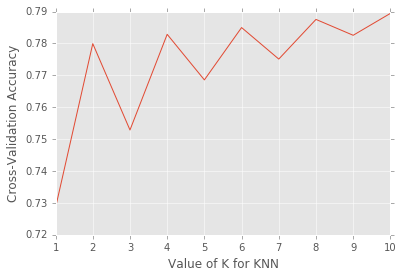

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')

In [13]:
# Examine the tenth tuple, the optimal model parameters and save scores for statistical test
print gs.grid_scores_[9].parameters
print gs.grid_scores_[9].cv_validation_scores
print gs.grid_scores_[9].mean_validation_score
knn_1 = gs.grid_scores_[9].cv_validation_scores

{'n_neighbors': 10}
[ 0.78952602  0.79085184  0.79118329  0.78786874  0.78912467  0.79011936
  0.78348806  0.79144562  0.78474295  0.7960199 ]
0.789437039984


In [14]:
# Examine the best model
print gs.best_score_
print gs.best_params_
print gs.best_estimator_

0.789437039984
{'n_neighbors': 10}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')


In [15]:
yhat = np.zeros(y.shape) # we will fill this with predictions

# Create cross validation iterator
cv = StratifiedKFold(y, n_folds=10)

# Get a handle to the classifier object, which defines the type
knn_clf = KNeighborsClassifier(n_neighbors=10)

# Now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    knn_clf.fit(X[train],y[train])
    yhat[test] = knn_clf.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
print 'KNN accuracy', total_accuracy

KNN accuracy 0.789437039984


From the grid search, the most optimal model shows that with a value of k = 10 we can expect a 79% accuracy in predicting whether an individual will make more or less than $50K annually.

## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth=50, n_estimators=150, n_jobs=-1, oob_score=True)

# Now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    rf_clf.fit(X[train],y[train])
    yhat[test] = rf_clf.predict(X[test])
    
total_accuracy = mt.accuracy_score(y, yhat)
print 'Random Forest Accuracy', total_accuracy

Random Forest Accuracy 0.849512631788


In [17]:
# Define the parameter values that should be searched
depth_range = range(1, 50)

In [18]:
# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = {"max_depth": [25, 50, 75, 100]}
print param_grid

{'max_depth': [25, 50, 75, 100]}


In [19]:
# Instantiate and fit the grid
gs = GridSearchCV(rf_clf, param_grid, cv = 10, scoring = 'accuracy')
gs.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [25, 50, 75, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [20]:
# Create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in gs.grid_scores_]
print(grid_mean_scores)

[0.85780120681652405, 0.85120350109409193, 0.85027518069093566, 0.85097142099330281]


In [21]:
# Examine the best model
print gs.best_score_
print gs.best_params_

0.857801206817
{'max_depth': 25}


Since the grid search yielded the lowest given parameter for the depth of the model, we decided to investigate further to see if we could use an even smaller max depth. We did this by changing the parameters below. 

In [22]:
# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = {"max_depth": [5, 10, 15, 20, 25]}
print param_grid

{'max_depth': [5, 10, 15, 20, 25]}


In [23]:
# Instantiate and fit the grid
gs = GridSearchCV(rf_clf, param_grid, cv = 10, scoring = 'accuracy')
gs.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 10, 15, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [24]:
# Create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in gs.grid_scores_]
print(grid_mean_scores)

[0.83568728864133679, 0.85435315960480074, 0.85670711491280416, 0.85988992772362571, 0.85853060141900406]


In [25]:
# Examine the best model
print gs.best_score_
print gs.best_params_

0.859889927724
{'max_depth': 20}


In [26]:
# Examine the fourth tuple, the optimal model parameters and save scores for statistical test
print gs.grid_scores_[3].parameters
print gs.grid_scores_[3].cv_validation_scores
print gs.grid_scores_[3].mean_validation_score
rf_1 = gs.grid_scores_[3].cv_validation_scores

{'max_depth': 20}
[ 0.84852502  0.85913159  0.85946304  0.85150812  0.86306366  0.85908488
  0.86372679  0.8693634   0.86733002  0.85771144]
0.859889927724


In [27]:
# Using the best parameters to make prediction
# Train model using all dtaa and the best known parameters
rfc = RandomForestClassifier(max_depth=20, n_estimators=150, n_jobs=-1, oob_score=True)

# Now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    rf_clf.fit(X[train],y[train])
    yhat[test] = rf_clf.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
print 'Random Forest Accuracy', total_accuracy

Random Forest Accuracy 0.850341489291


In this model, we can expect that our most optimal model would produce a max depth of 20 and give an 86% accuracy of properly classifying.

## Logistic Regression

In [28]:
# Reference: https://github.com/eclarson/DataMiningNotebooks/blob/master/04.%20Logits and SVM.ipynb
# Run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn import metrics as mt

# First we create a reusable logisitic regression object
# Here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object

# Now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# The indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object: 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # Train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1

('====Iteration', 0, ' ====')
('accuracy', 0.78123964202850515)
('confusion matrix\n', array([[2153,   83],
       [ 577,  204]]))
('====Iteration', 1, ' ====')
('accuracy', 0.79615512098110708)
('confusion matrix\n', array([[2207,   82],
       [ 533,  195]]))
('====Iteration', 2, ' ====')
('accuracy', 0.79774535809018565)
('confusion matrix\n', array([[2217,   92],
       [ 518,  189]]))
('====Iteration', 3, ' ====')
('accuracy', 0.78481432360742709)
('confusion matrix\n', array([[2167,   89],
       [ 560,  200]]))
('====Iteration', 4, ' ====')
('accuracy', 0.78547745358090182)
('confusion matrix\n', array([[2180,   84],
       [ 563,  189]]))
('====Iteration', 5, ' ====')
('accuracy', 0.80603448275862066)
('confusion matrix\n', array([[2225,   62],
       [ 523,  206]]))
('====Iteration', 6, ' ====')
('accuracy', 0.78647214854111402)
('confusion matrix\n', array([[2180,   89],
       [ 555,  192]]))
('====Iteration', 7, ' ====')
('accuracy', 0.79011936339522548)
('confusion matrix\

In [29]:
# Here we can change some of the parameters interactively
from ipywidgets import widgets as wd

def lr_explor(cost):
    lr_clf = LogisticRegression(penalty='l2', C=cost, class_weight=None) # get object
    accuracies = cross_val_score(lr_clf,X,y=y,cv=cv_object) # this also can help with parallelism
    print(accuracies)

wd.interact(lr_explor,cost=(0.001,5.0,0.05))

[ 0.78256546  0.79615512  0.79741379  0.78481432  0.78547745  0.80271883
  0.78680371  0.79011936  0.78680371  0.79210875]


<function __main__.lr_explor>

We used the above interactive explorer to evaluate different cost variables.<br>
We discovered that we maintained approximately 80% accuracy for the full range of 0.001 to 5<br>
Given we have no significant changes with varying cost, we will leave to 1.0

<b>Interpretting Weights</b>

In [30]:
# Interpret the weights

# Iterate over the coefficients
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = df.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

('age', 'has weight of', -0.0033829598987452918)
('fnlwgt', 'has weight of', -4.8578054646231636e-06)
('education_num', 'has weight of', -0.00081817318777200015)
('capital_gain', 'has weight of', 0.00032209767900921125)
('capital_loss', 'has weight of', 0.00071824456958147881)
('hours_per_week', 'has weight of', -0.0040907828628927306)
('workclass_ Federal-gov', 'has weight of', 8.5380714057231586e-06)
('workclass_ Local-gov', 'has weight of', -2.8957352724720393e-06)
('workclass_ Private', 'has weight of', -0.0002051010818266334)
('workclass_ Self-emp-inc', 'has weight of', 2.4127649731639494e-05)
('workclass_ Self-emp-not-inc', 'has weight of', -1.187055877591543e-05)
('workclass_ State-gov', 'has weight of', -4.5786063369810503e-06)
('workclass_ Without-pay', 'has weight of', -5.3912327453589148e-07)
('marital_status_ Divorced', 'has weight of', -9.9717907797308714e-05)
('marital_status_ Married-AF-spouse', 'has weight of', 3.5659331922809132e-07)
('marital_status_ Married-civ-spous

<b>Since we want to make the weights which have a large magnitude correspond to features that are more important.</b>
<b>To achieve this, we normalize the features and therefore make the weights interpretable.</b>

In [31]:
from sklearn.preprocessing import StandardScaler

# We want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# Scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) #Find scalings for each column that make this zero mean and unit std
# The line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # Apply to training
X_test_scaled = scl_obj.transform(X_test) # Apply those means and std to the test set (without snooping at the test set values)

# Train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05) # Get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # Train object

y_hat = lr_clf.predict(X_test_scaled) # Get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# Sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,df.columns) # Combine attributes
zip_vars.sort(key = lambda t: np.abs(t[0])) # Sort them by the magnitude of the weight
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # Now print them out

('accuracy:', 0.84151193633952259)
[[2063  184]
 [ 294  475]]
('IsMale', 'has weight of', 0.0)
('native_country_ Haiti', 'has weight of', 0.00050377088546294218)
('native_country_ Trinadad&Tobago', 'has weight of', -0.00082632547358636884)
('native_country_ Hungary', 'has weight of', 0.0017279696823079731)
('education_ Some-college', 'has weight of', -0.0037096812490081061)
('education_ Assoc-voc', 'has weight of', 0.004673068906207424)
('native_country_ Hong', 'has weight of', 0.0055380217871709029)
('native_country_ Taiwan', 'has weight of', -0.0055672320398158946)
('native_country_ Laos', 'has weight of', -0.0058085350940216534)
('native_country_ Portugal', 'has weight of', 0.0069257883452828141)
('native_country_ Japan', 'has weight of', 0.0086212535206175896)
('native_country_ Iran', 'has weight of', 0.0086376019173788829)
('native_country_ Puerto-Rico', 'has weight of', -0.0088819353563629657)
('native_country_ Poland', 'has weight of', 0.0097057775637365389)
('native_country_ Sc

<b>Evaluating the above ordered weights, we can see that capital_gain, marital_status of married-civ-spouse, hours_per_week, education_num and age are the most important variables.  We also visualize these weights below before we remove the unnecessary variables.</b>

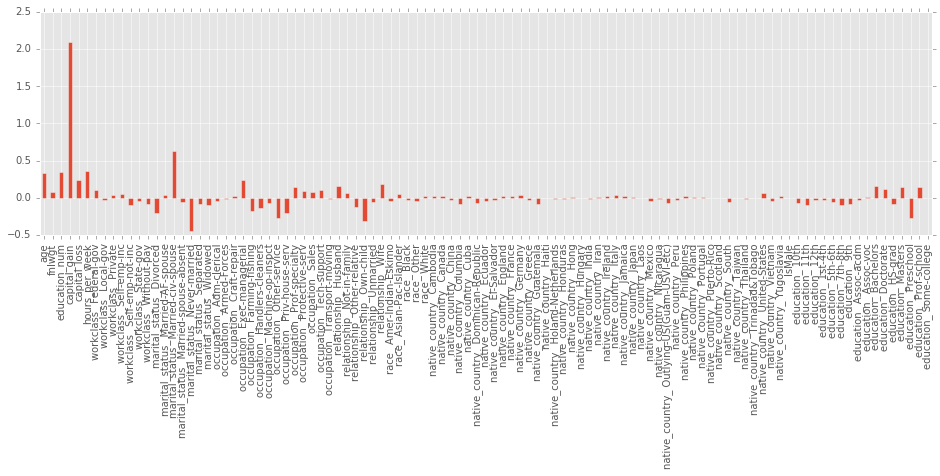

{'boxes': [<matplotlib.lines.Line2D at 0x1acdecf8>],
 'caps': [<matplotlib.lines.Line2D at 0x1acef978>,
 'fliers': [<matplotlib.lines.Line2D at 0x1acffa20>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1acff4a8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1acdedd8>,
  <matplotlib.lines.Line2D at 0x1acef400>]}

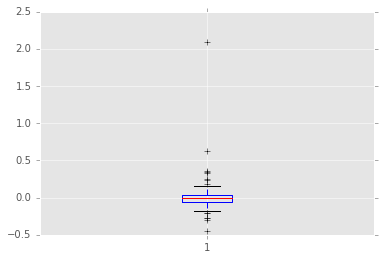

In [32]:
# Now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(16,4))
weights = pd.Series(lr_clf.coef_[0],index=df.columns)
weights.plot(kind='bar')
plt.show()

plt.boxplot(weights)


After observing the weights, we find only keeping variables with a weight greater than or equal to .31 yields an optimal model.

The four blocks of code below were run to determine the accuracy associated with keeping different variables based upon their weights:

coef <= 0.1 yields approx. 84% accuracy - 15 attributes<br>
coef <= 0.15 yields approx. 84% accuracy - 10 attributes<br>
coef <= 0.2 yields approx. 84% accuracy - 9 attributes<br>
coef <= 0.25 yeilds approx. 83% accuracy - 7 attributes<br>
coef <= 0.31 yeilds approx. 83% accuracy - 5 attributes<br>
coef <= 0.35 yeilds approx. 80% accuracy - 3 attributes<br>
coef <= 0.4 yeilds approx. 78% accuracy - 2 attributes<br>

We feel an 80% accuracy which keeps capital_gain, hours_per_week, age, education_num, and marital_status_ Married-civ-spouse is a suitable model which minimizes overfitting.

In [33]:
## http://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe
 
zip_vars = zip(lr_clf.coef_.T,df.columns) # combine attributes
zip_vars.sort(key = lambda t: np.abs(t[0])) # sort them by the magnitude of the weight

## Dropping weights less than or equal to 0.31
for coef, name in zip_vars:
    if coef <= 0.31:
        df.drop(name, axis=1, inplace=True)
        print("dropping",name)

('dropping', 'IsMale')
('dropping', 'native_country_ Haiti')
('dropping', 'native_country_ Trinadad&Tobago')
('dropping', 'native_country_ Hungary')
('dropping', 'education_ Some-college')
('dropping', 'education_ Assoc-voc')
('dropping', 'native_country_ Hong')
('dropping', 'native_country_ Taiwan')
('dropping', 'native_country_ Laos')
('dropping', 'native_country_ Portugal')
('dropping', 'native_country_ Japan')
('dropping', 'native_country_ Iran')
('dropping', 'native_country_ Puerto-Rico')
('dropping', 'native_country_ Poland')
('dropping', 'native_country_ Scotland')
('dropping', 'native_country_ Holand-Netherlands')
('dropping', 'occupation_ Transport-moving')
('dropping', 'native_country_ Philippines')
('dropping', 'native_country_ Yugoslavia')
('dropping', 'native_country_ Thailand')
('dropping', 'occupation_ Armed-Forces')
('dropping', 'native_country_ Honduras')
('dropping', 'native_country_ Ireland')
('dropping', 'native_country_ England')
('dropping', 'native_country_ Jamai

Review what is in the dataframe

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 5 columns):
age                                   30162 non-null int64
education_num                         30162 non-null int64
capital_gain                          30162 non-null float64
hours_per_week                        30162 non-null int64
marital_status_ Married-civ-spouse    30162 non-null float64
dtypes: float64(2), int64(3)
memory usage: 1.4 MB


<b>With the new dataset, we again are performing an 80/20 split of data for cross validating the models with training/test data</b>

In [35]:
from sklearn.cross_validation import ShuffleSplit 

X = df.values # use everything else to predict!

## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
#    have converted them into simple matrices to use with scikit learn
    
    
# To use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n=num_instances,
                         n_iter=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(30162, n_iter=3, test_size=0.2, random_state=None)


In [36]:
## Re run logistic regression with dropped weights

# First we create a reusable logisitic regression object.
# Here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object

# Now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# The indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object: 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # Train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # Train object
    y_hat = lr_clf.predict(X_test) # Get test set precitions

    # View accuracies
    accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # This also can help with parallelism
    lr_1 = cross_val_score(lr_clf, X, y=y, cv=cv_object) # Store for statistical test
    print(accuracies)

[ 0.83756009  0.83872037  0.83590254]
[ 0.83523952  0.83142715  0.83507376]
[ 0.83258744  0.83275319  0.83573678]


In [37]:
# Interpret the weights

# Iterate over the coefficients
weights = lr_clf.coef_.T # Take transpose to make a column vector
variable_names = df.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

('age', 'has weight of', 0.016135425510293244)
('education_num', 'has weight of', 0.26336084876765881)
('capital_gain', 'has weight of', 0.00029307236773578986)
('hours_per_week', 'has weight of', 0.016106106989443689)
('marital_status_ Married-civ-spouse', 'has weight of', 2.0901401421378925)


In [38]:
from sklearn.preprocessing import StandardScaler

# We want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# Scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # Find scalings for each column that make this zero mean and unit std
# The line of code above only looks at training data to get mean and std and we can use it 
# To transform new feature data

X_train_scaled = scl_obj.transform(X_train) # Apply to training
X_test_scaled = scl_obj.transform(X_test) # Apply those means and std to the test set (without snooping at the test set values)

# Train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05) # Get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # Train object

y_hat = lr_clf.predict(X_test_scaled) # Get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# Sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,df.columns) # Combine attributes
zip_vars.sort(key = lambda t: np.abs(t[0])) # Sort them by the magnitude of the weight
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # Now print them out

('accuracy:', 0.83142715067130779)
[[4165  333]
 [ 684  851]]
('hours_per_week', 'has weight of', 0.36307162149765554)
('age', 'has weight of', 0.39104078916512403)
('education_num', 'has weight of', 0.93327407871660906)
('marital_status_ Married-civ-spouse', 'has weight of', 1.1695138820672377)
('capital_gain', 'has weight of', 1.9918634897982042)


The most important attribute from the logistic regression model is 'capital_gain' followed by 'marital_status_Married-civ-spouse', 'education_num', 'age', and 'hours_per_week' in predicting whether income is greater than \$50K per year or if it is equal to or less than \$50K per year. This is illustrated by the bar graph below. People with a salary of greater than $50K can be assumed to have higher capital gains. It is also more typical for one to increase income as they get old and have more education which is why it makes sense that age and education_num also are part of the model. Marriage tends to create typically create more stability, therefore, one would expect a better earning potential. They will be more career-focused. Lastly, hard work usually pays off, so higher hours worked per week should create a higher earning potential.

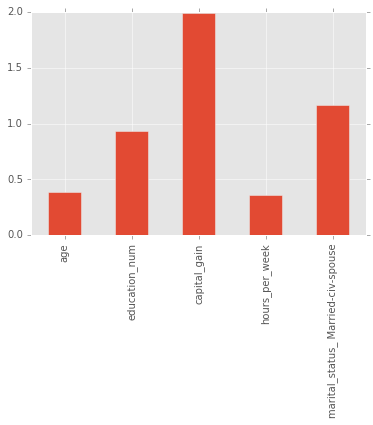

In [39]:
# Now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=df.columns)
weights.plot(kind='bar')
plt.show()

# Part 2
For the second part, we want to test for a different variable. As stated in the introduction, we will now begin the second task in predicting the education level of an individual.

## Preparing the data
We can use part of the inital work we did for cleaning up the data. We did this by saving the dataframe to partBDf. We reset df to the original dataframe by setting it equal to partBDF below. We now will have to prepare the data for analysis again.

In [40]:
# let's reset df back to the saved version of the data for part b
df = partBDf

In [41]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,IsMale,salary_cat_binary
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,...,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.0,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238,0.031265,0.068530,0.738877,0.035608,...,0.000365,0.002354,0.001392,0.000564,0.000597,0.911876,0.002122,0.000530,0.0,0.248922
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984,0.174035,0.252657,0.439254,0.185313,...,0.019094,0.048461,0.037291,0.023734,0.024422,0.283480,0.046016,0.023026,0.0,0.432396
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [42]:
print(df.columns)

Index([u'age', u'fnlwgt', u'education', u'education_num', u'capital_gain',
       u'capital_loss', u'hours_per_week', u'workclass_ Federal-gov',
       u'workclass_ Local-gov', u'workclass_ Private',
       u'workclass_ Self-emp-inc', u'workclass_ Self-emp-not-inc',
       u'workclass_ State-gov', u'workclass_ Without-pay',
       u'marital_status_ Divorced', u'marital_status_ Married-AF-spouse',
       u'marital_status_ Married-civ-spouse',
       u'marital_status_ Married-spouse-absent',
       u'marital_status_ Never-married', u'marital_status_ Separated',
       u'marital_status_ Widowed', u'occupation_ Adm-clerical',
       u'occupation_ Armed-Forces', u'occupation_ Craft-repair',
       u'occupation_ Exec-managerial', u'occupation_ Farming-fishing',
       u'occupation_ Handlers-cleaners', u'occupation_ Machine-op-inspct',
       u'occupation_ Other-service', u'occupation_ Priv-house-serv',
       u'occupation_ Prof-specialty', u'occupation_ Protective-serv',
       u'occupation_

In [43]:
del df['education']

In [44]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,IsMale,salary_cat_binary
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,...,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.0,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238,0.031265,0.068530,0.738877,0.035608,...,0.000365,0.002354,0.001392,0.000564,0.000597,0.911876,0.002122,0.000530,0.0,0.248922
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984,0.174035,0.252657,0.439254,0.185313,...,0.019094,0.048461,0.037291,0.023734,0.024422,0.283480,0.046016,0.023026,0.0,0.432396
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [45]:
print(df.columns)


Index([u'age', u'fnlwgt', u'education_num', u'capital_gain', u'capital_loss',
       u'hours_per_week', u'workclass_ Federal-gov', u'workclass_ Local-gov',
       u'workclass_ Private', u'workclass_ Self-emp-inc',
       u'workclass_ Self-emp-not-inc', u'workclass_ State-gov',
       u'workclass_ Without-pay', u'marital_status_ Divorced',
       u'marital_status_ Married-AF-spouse',
       u'marital_status_ Married-civ-spouse',
       u'marital_status_ Married-spouse-absent',
       u'marital_status_ Never-married', u'marital_status_ Separated',
       u'marital_status_ Widowed', u'occupation_ Adm-clerical',
       u'occupation_ Armed-Forces', u'occupation_ Craft-repair',
       u'occupation_ Exec-managerial', u'occupation_ Farming-fishing',
       u'occupation_ Handlers-cleaners', u'occupation_ Machine-op-inspct',
       u'occupation_ Other-service', u'occupation_ Priv-house-serv',
       u'occupation_ Prof-specialty', u'occupation_ Protective-serv',
       u'occupation_ Sales', u'occ

In [46]:
# We did this above, this means we don't have 1 field for education, 
# probably means we need to delete all of this if we use education number.
# Because of that, we might need to do the step right above this one at any earlier step.


# For this project, we are going to do a 10 fold split? or maybe stratified
if 'education_num' in df:
    y = df['education_num'].values # get the labels we want
    del df['education_num']
X = df.values
from sklearn.cross_validation import KFold 
cv_object = KFold(n=len(X), n_folds=10)
print(cv_object)

sklearn.cross_validation.KFold(n=30162, n_folds=10, shuffle=False, random_state=None)


## K-Nearest Neighbors

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import StratifiedKFold, cross_val_score
import numpy as np
from sklearn import metrics as mt
from sklearn.grid_search import GridSearchCV

yhat = np.zeros(y.shape) # we will fill this with predictions

# Create cross validation iterator
cv = StratifiedKFold(y, n_folds=10)

# Get a handle to the classifier object, which defines the type
knn_clf = KNeighborsClassifier(n_neighbors=3)

# Now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    knn_clf.fit(X[train],y[train])
    yhat[test] = knn_clf.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
print 'KNN accuracy', total_accuracy

# Source: https://youtu.be/Gol_qOgRqfA

# Define parameter values to be searched
k_range = range(1, 20)
print(k_range)

# Create parameter grid: map parameter names to values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

# Instantiate the grid
gs = GridSearchCV(knn_clf, param_grid = param_grid, cv = 10, scoring = 'accuracy')

# Fit grid with data
gs.fit(X,y)

KNN accuracy 0.226046018169
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [48]:
# View the complete results(list of named tuples)
gs.grid_scores_

[mean: 0.22005, std: 0.00903, params: {'n_neighbors': 1},
 mean: 0.22760, std: 0.00510, params: {'n_neighbors': 2},
 mean: 0.22605, std: 0.00748, params: {'n_neighbors': 3},
 mean: 0.23656, std: 0.00642, params: {'n_neighbors': 4},
 mean: 0.25098, std: 0.00735, params: {'n_neighbors': 5},
 mean: 0.27021, std: 0.00596, params: {'n_neighbors': 6},
 mean: 0.27492, std: 0.00655, params: {'n_neighbors': 7},
 mean: 0.27899, std: 0.00588, params: {'n_neighbors': 8},
 mean: 0.28075, std: 0.00521, params: {'n_neighbors': 9},
 mean: 0.28380, std: 0.00452, params: {'n_neighbors': 10},
 mean: 0.28715, std: 0.00406, params: {'n_neighbors': 11},
 mean: 0.29007, std: 0.00345, params: {'n_neighbors': 12},
 mean: 0.29315, std: 0.00460, params: {'n_neighbors': 13},
 mean: 0.29328, std: 0.00342, params: {'n_neighbors': 14},
 mean: 0.29733, std: 0.00571, params: {'n_neighbors': 15},
 mean: 0.29736, std: 0.00370, params: {'n_neighbors': 16},
 mean: 0.30005, std: 0.00515, params: {'n_neighbors': 17},
 mean:

In [49]:
# Create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in gs.grid_scores_]
print(grid_mean_scores)

[0.2200450898481533, 0.22760427027385452, 0.22604601816855646, 0.23655593130429017, 0.25097805185332539, 0.27020754591870566, 0.27491545653471255, 0.27899343544857769, 0.28075061335455209, 0.28380080896492277, 0.28714939327630795, 0.29006697168622769, 0.29315032159671112, 0.293282938797162, 0.29732776341091438, 0.29736091771102713, 0.3000464160201578, 0.29925071281745241, 0.29925071281745241]


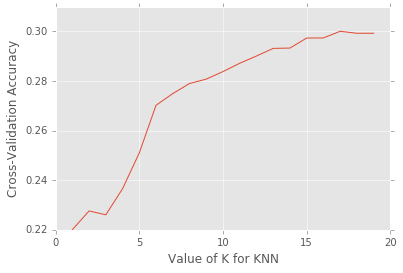

In [50]:
# Plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')

In [51]:
# Examine the best model
print gs.best_score_
print gs.best_params_
print gs.best_estimator_

0.30004641602
{'n_neighbors': 17}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')


In [52]:
# Examine the sevententh tuple, the optimal model parameters and save scores for statistical test
print gs.grid_scores_[16].parameters
print gs.grid_scores_[16].cv_validation_scores
print gs.grid_scores_[16].mean_validation_score
knn_2 = gs.grid_scores_[16].cv_validation_scores

{'n_neighbors': 17}
[ 0.29516876  0.29559748  0.29437086  0.30033113  0.3050679   0.30271883
  0.29210875  0.30179283  0.30551862  0.30784574]
0.30004641602


In [53]:
yhat = np.zeros(y.shape) # We will fill this with predictions

# Create cross validation iterator
cv = StratifiedKFold(y, n_folds=10)

# Get a handle to the classifier object, which defines the type
knn_clf = KNeighborsClassifier(n_neighbors=17)

# Now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    knn_clf.fit(X[train],y[train])
    yhat[test] = knn_clf.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
print 'KNN accuracy', total_accuracy

KNN accuracy 0.30004641602


The K-Nearest Neighbors classifier produced a 30% accuracy of correctly classifying an individual's education level based on the other given variables in the dataset. This could be of use in a business setting because it may be important for a business to understand the education level of the demographics of the target customer base. Unfortunately, getting it correct only 30% of the time is not very accurate and can result in many errors costing a business a lot of money in marketing products to the wrong demographic. For this dataset, KNN may not be the best algorithm to be using when predicting the education class of an individual.

## Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

rf_clf = RandomForestClassifier(max_depth=50, n_estimators=150, n_jobs=-1, oob_score=True)

# Now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    rf_clf.fit(X[train],y[train])
    yhat[test] = rf_clf.predict(X[test])    

    total_accuracy = mt.accuracy_score(y, yhat)
print 'Random Forest Accuracy', total_accuracy

Random Forest Accuracy 0.371460778463


In [55]:
# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = {"max_depth": [25, 50, 75, 100]}
print param_grid

{'max_depth': [25, 50, 75, 100]}


In [56]:
# Instantiate and fit the grid
gs = GridSearchCV(rf_clf, param_grid, cv = 10, scoring = 'accuracy')
gs.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [25, 50, 75, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [57]:
# View the complete results
gs.grid_scores_

[mean: 0.41602, std: 0.00762, params: {'max_depth': 25},
 mean: 0.37275, std: 0.00682, params: {'max_depth': 50},
 mean: 0.36974, std: 0.00921, params: {'max_depth': 75},
 mean: 0.37126, std: 0.00861, params: {'max_depth': 100}]

In [58]:
# Examine the best model
print gs.best_score_
print gs.best_params_

0.416020157814
{'max_depth': 25}


Since the grid search yielded the lowest given parameter for the depth of the model, we decided to investigate further to see if we could use an even smaller max depth. We did this by changing the parameters below. 

In [59]:
param_grid = {"max_depth": [15, 25, 35]}
print param_grid

{'max_depth': [15, 25, 35]}


In [60]:
# Instantiate and fit the grid
gs = GridSearchCV(rf_clf, param_grid, cv = 10, scoring = 'accuracy')
gs.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [15, 25, 35]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='accuracy', verbose=0)

In [61]:
# View the complete results
gs.grid_scores_

[mean: 0.43174, std: 0.00573, params: {'max_depth': 15},
 mean: 0.41433, std: 0.00721, params: {'max_depth': 25},
 mean: 0.38572, std: 0.00812, params: {'max_depth': 35}]

In [62]:
# Examine the best model
print gs.best_score_
print gs.best_params_

0.431735296068
{'max_depth': 15}


In [63]:
param_grid = {"max_depth": [5, 10, 15]}
print param_grid

{'max_depth': [5, 10, 15]}


In [64]:
print param_grid# Instantiate and fit the grid
gs = GridSearchCV(rf_clf, param_grid, cv = 10, scoring = 'accuracy')
gs.fit(X,y)

{'max_depth': [5, 10, 15]}


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 10, 15]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='accuracy', verbose=0)

In [65]:
# Examine the best model
print gs.best_score_
print gs.best_params_

0.430077581062
{'max_depth': 15}


In [66]:
# Examine the thrid tuple, the optimal model parameters and save scores for statistical test
print gs.grid_scores_[2].parameters
print gs.grid_scores_[2].cv_validation_scores
print gs.grid_scores_[2].mean_validation_score
rf_2 = gs.grid_scores_[2].cv_validation_scores

{'max_depth': 15}
[ 0.41760424  0.42634889  0.43443709  0.42218543  0.4309374   0.43832891
  0.43103448  0.43691899  0.42918883  0.43384309]
0.430077581062


We found the best parameter using grid search and now we will use those parameters to perform the Random Forest again below.

In [67]:
# Using the best parameters to make prediction
# Train model using all dtaa and the best known parameters
rfc = RandomForestClassifier(max_depth=15, n_estimators=150, n_jobs=-1, oob_score=True)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    rfc.fit(X[train],y[train])
    yhat[test] = rfc.predict(X[test])  
    
total_accuracy = mt.accuracy_score(y, yhat)
print 'Random Forest Accuracy', total_accuracy

Random Forest Accuracy 0.431668987468


In this model, we can expect that our most optimal model would produce a max depth of 15 and give an 43% accuracy of properly classifying.

## Logistic Regression

In [68]:
# Reference: https://github.com/eclarson/DataMiningNotebooks/blob/master/04.%20Logits and SVM.ipynb
# Run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn import metrics as mt

# First we create a reusable logisitic regression object
# Here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object

# Now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# The indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object: 
    # We will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # Train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # Train object
    y_hat = lr_clf.predict(X_test) # Get test set precitions

    # View accuracies
accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # This also can help with parallelism
lr_2 = cross_val_score(lr_clf, X, y=y, cv=cv_object) # Store for statistical test
print(accuracies)

[ 0.32449453  0.3291349   0.32460212  0.33687003  0.33720159  0.33421751
  0.32062334  0.31598143  0.32161804  0.31763926]


From Logistic Regression we can expect a 33% accuracy in predicting an individuals education level.

# Significance Tests

## Task 1 Significance Test

In [69]:
from scipy import stats

# Print mean accuracies for first task, predicting whether an individual makes more or less than 50K annually.
print knn_1.mean()
print rf_1.mean()
print lr_1.mean()

# Compare Random Forest (86% accuracy) and Logistic Regression (84% accuracy) models to determine if the difference 
# significant with 95% confidence?
stats.ttest_ind(rf_1,lr_1)

0.789437046849
0.85989079621
0.837891596221


Ttest_indResult(statistic=5.3327048365071592, pvalue=0.00024007504657524729)

## Task 2 Significance Test

In [70]:
# Print mean accuracies for second task,predicting the education level of an individual.
print knn_2.mean()
print rf_2.mean()
print lr_2.mean()

# Compare Random Forest (43% accuracy) and Logistic Regression (33% accuracy) models to determine if the difference 
# significant with 95% confidence?
stats.ttest_ind(rf_2,lr_2)

0.300052091331
0.430082734057
0.326238274886


Ttest_indResult(statistic=32.386159663032537, pvalue=2.070481983885274e-17)

## Conclusion
Based on this analysis, we feel confident that our model can accurately predict whether an individual makes more or less than 50K annually. <br>

* From KNN we can expect a 79% accuracy in predicting whether an individual will make more or less than 50K annually.<br>
* From Random Forest we can expect a 86% accuracy in predicting whether an individual will make more or less than 50K annually.<br>
* From Logistic Regression we can expect a 84% accuracy in predicting whether an individual will make more or less than 50K annually.<br>

We can say our random forest model is the most accurate, since a significant difference with 95% confidence between Random Forest (86% accuracy) and Logistic Regression (84% accuracy) exists, T-statistic = 5.9 with p-value = 0.0001.

We feel that our model is less accurate in predicting and individual's education level. 

* From KNN we can expect a 30% accuracy in predicting and individual's education level.<br>
* From Random Forest we can expect a 43% accuracy predicting and individual's education level.<br>
* From Logistic Regression we can expect a 33% accuracy predicting and individual's education level.<br>

We can say our random forest model is the most accurate, since a significant difference with 95% confidence between Random Forest (43% accuracy) and Logistic Regression (33% accuracy) exists, T-statistic = 33.2 with p-value < 0.0001.